In [134]:
%matplotlib inline
import csv
import seaborn as sns
import re
import pandas as pd
import requests
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from ggplot import*
import plotly as py
import plotly
import plotly.graph_objs as go
import seaborn as sbn
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
import psycopg2
py.offline.init_notebook_mode()

These Final project will analyze summer olpymic in track and field data from 1896-2016 with the following columns
 - Gender = Men or women
 - Event = Sport type such as 100M, Marathon, Triple Jump 
 - Location = The cities where the summer olympics where held Athens, Greece being the first
 - Year = Year each summer olpymic were held in, 1896 being the first year modern olympic was held 
 - Medal = The Three kinds of medal awarded Gold(G), Silver(S), Bronze(B)
 - Name = Names of top Medal winnering athlets
 - Nationality = Countries represented by each top medal winning participants
 - Result = The finishing time for each top medal winning athlets


# Thesis - how does the geographic, socio-political, economic condition play a role in the participation of summer olympic in track and field by the number of medals won

In [76]:
#Read File
data = pd.read_csv('Olympic.csv')
#Delete Unnamed8 cell as it is unnecessary
del data['Unnamed: 8']

In [77]:
data.head(1)

Gender       Event Location  Year Medal           Name Nationality   Result
0      M  10000M Men      Rio  2016     G  Mohamed FARAH         USA  25:05.2

In [63]:
#Append olympic data with country data to do more analysis
conn = psycopg2.connect('postgresql://bedabe01:@localhost/world')
nation = pd.read_sql_query('select * from country', con=conn)
nation.head()
nation = nation.rename(columns={'code': 'Nationality','name': 'Country'})


In [64]:
#Append olympic data with country data to do more analysis
merge_data = data.set_index('Nationality').join(nation.set_index('Nationality'))
merge_data.tail(2)

Gender             Event               Location  Year Medal  \
Nationality                                                               
YUG              M      Marathon Men  Melbourne / Stockholm  1956     S   
ZAM              M  400M Hurdles Men                Atlanta  1996     S   

                       Name   Result     Country continent           region  \
Nationality                                                                   
YUG          Franjo MIHALIC  2:26:32  Yugoslavia    Europe  Southern Europe   
ZAM           Samuel MATETE    47.78         NaN       NaN              NaN   

             ...    indepyear  population  lifeexpectancy      gnp  gnpold  \
Nationality  ...                                                             
YUG          ...       1918.0  10640000.0            72.4  17000.0     NaN   
ZAM          ...          NaN         NaN             NaN      NaN     NaN   

               localname    governmentform         headofstate capital  code2  
Nationality                                                                    
YUG          Jugoslavija  Federal Republic  Vojislav Kotunica  1792.0     YU  
ZAM                  NaN               NaN                 NaN     NaN    NaN  

[2 rows x 21 columns]

# Cleaning Data

In [ ]:
de = merge_data.isnull().mean(axis=0)
l = []
for i in range(0,len(de)):
    if de[i] < 0.6:
        templist = list(de[de==de[i]].index) 
        for i in range (0,len(templist)):
            l.append(templist[i])

variable_consistante = list(set(l)) 
merge_data= merge_data.loc[:, lambda df: variable_consistante] 
merge_data.shape

In [ ]:
# Replace NaN value by 0 for nuremic features.
merge_data["Result"].fillna(0, inplace=True)
merge_data["Year"].fillna(0, inplace=True)
merge_data["gnp"].fillna(0, inplace=True)
merge_data["population"].fillna(0, inplace=True)
merge_data["lifeexpectancy"].fillna(0, inplace=True)

In [78]:
data = {'Country': ['Argentina', 'Australia','Austria','Belarus','Belgium', 'Brazil','Brunei','Burundi','Cameroon', 'Canada','China','Colombia',                
                    'Cuba','Czech Republic', 'Côte dIvoire','Djibouti','Dominican Republic','Ecuador','Eritrea', 'Estonia',                  
                    'Ethiopia', 'Finland', 'France', 'Hungary', 'Iceland', 'India', 'Ireland', 'Italy',  'Jamaica',  'Japan',  'Kazakstan', 'Kenya',                   
                    'Lithuania','Luxembourg', 'Mexico', 'Morocco','Mozambique','Namibia','New Zealand','Norway', 'Panama',  
                    'Poland','Qatar','Russian Federation','Slovakia','South Korea','Spain','Sweden','Syria',                    
                    'Tajikistan','Trinidad and Tobago','Tunisia','Turkey','Uganda' ,'Ukraine' ,
                    'United Kingdom','United States','Venezuela','Yugoslavia'],
        'Number_of_Medals': [4,57,4,14,12,10,3,2,2,53,23,3,40,12,1,1,3,2,1,6,53,74,60,30,1,1,6,46,74,20,4,87,5,1,11,
                             17,2,4,24,15,3,52,3,62,1,2,14,53,1,1,15,5,5,3,18,160,639,2,1]
        }
new_table = pd.DataFrame(data, columns=['Country','Number_of_Medals'])

In [79]:
merge_data2 = merge_data.set_index('Country').join(new_table.set_index('Country'))
merge_data2.head(1)

Gender         Event  Location  Year Medal            Name   Result  \
Country                                                                         
Argentina      M  Marathon Men  Helsinki  1952     S  Reinaldo GORNO  25:35.0   

               continent         region  surfacearea       ...         \
Country                                                    ...          
Argentina  South America  South America    2780400.0       ...          

           population  lifeexpectancy       gnp    gnpold  localname  \
Country                                                                
Argentina  37032000.0            75.1  340238.0  323310.0  Argentina   

             governmentform         headofstate capital  code2  \
Country                                                          
Argentina  Federal Republic  Fernando de la Rúa    69.0     AR   

          Number_of_Medals  
Country                     
Argentina              4.0  

[1 rows x 21 columns]

In [81]:
working_data = merge_data2

In [82]:
conn = psycopg2.connect('postgresql://bedabe01:@localhost/world')
nation = pd.read_sql_query('select code,lifeexpectancy from country', con=conn)
nation.head()
nation = nation.rename(columns={'code': 'Nationality'})

In [83]:
working_data2 = working_data.set_index('lifeexpectancy').join(nation.set_index('lifeexpectancy'))
working_data2.head(1)

Gender       Event Location  Year Medal          Name   Result  \
lifeexpectancy                                                                  
37.5                W  800M Women   Sydney  2000     G  Maria MUTOLA  01:56.2   

               continent          region  surfacearea     ...       \
lifeexpectancy                                            ...        
37.5              Africa  Eastern Africa     801590.0     ...        

                population     gnp  gnpold   localname governmentform  \
lifeexpectancy                                                          
37.5            19680000.0  2891.0  2711.0  Moçambique       Republic   

                        headofstate capital  code2 Number_of_Medals  \
lifeexpectancy                                                        
37.5            Joaquím A. Chissano  2698.0     MZ              2.0   

                Nationality  
lifeexpectancy               
37.5                    MOZ  

[1 rows x 21 columns]

In [93]:
x = working_data2[['governmentform','Number_of_Medals','Year','continent']]


# Impact of geographic location on the number of medals won by coutries in terms of continents they are located

In [98]:
medal_count1 = merge_data.groupby('continent')['Medal'].count().sort_values(ascending=False)
medal_count1.head()

continent
North America    838
Europe           647
Africa           178
Oceania           81
Asia              63
Name: Medal, dtype: int64

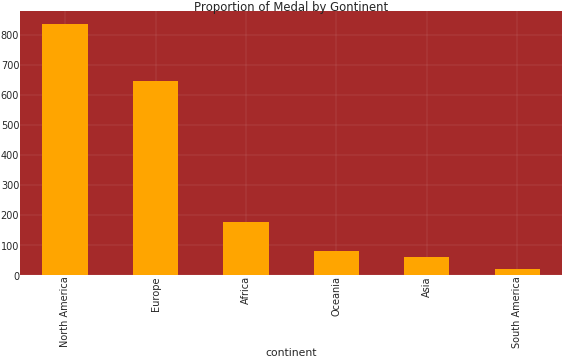

In [130]:
fig = plt.figure(figsize=(100,50), dpi=7)
ax = plt.subplot(111)
plt.rcParams['axes.facecolor'] = 'brown'
medal_count1.plot(kind='bar',color='orange',title='Proportion of Medal by Gontinent', legend=False)

It appears that North America is in the lead by winning 838 medals in 
summer olympics in track and field, South America coming in last.
However it is important to note that U.S.A is located in North America and from 
midterm project it was the country with the highest medal overall. After World War 2 power shifted and that might have impacted medals won by other countries in each
continents, thus let us observe participation of countries in each continet after WW2.

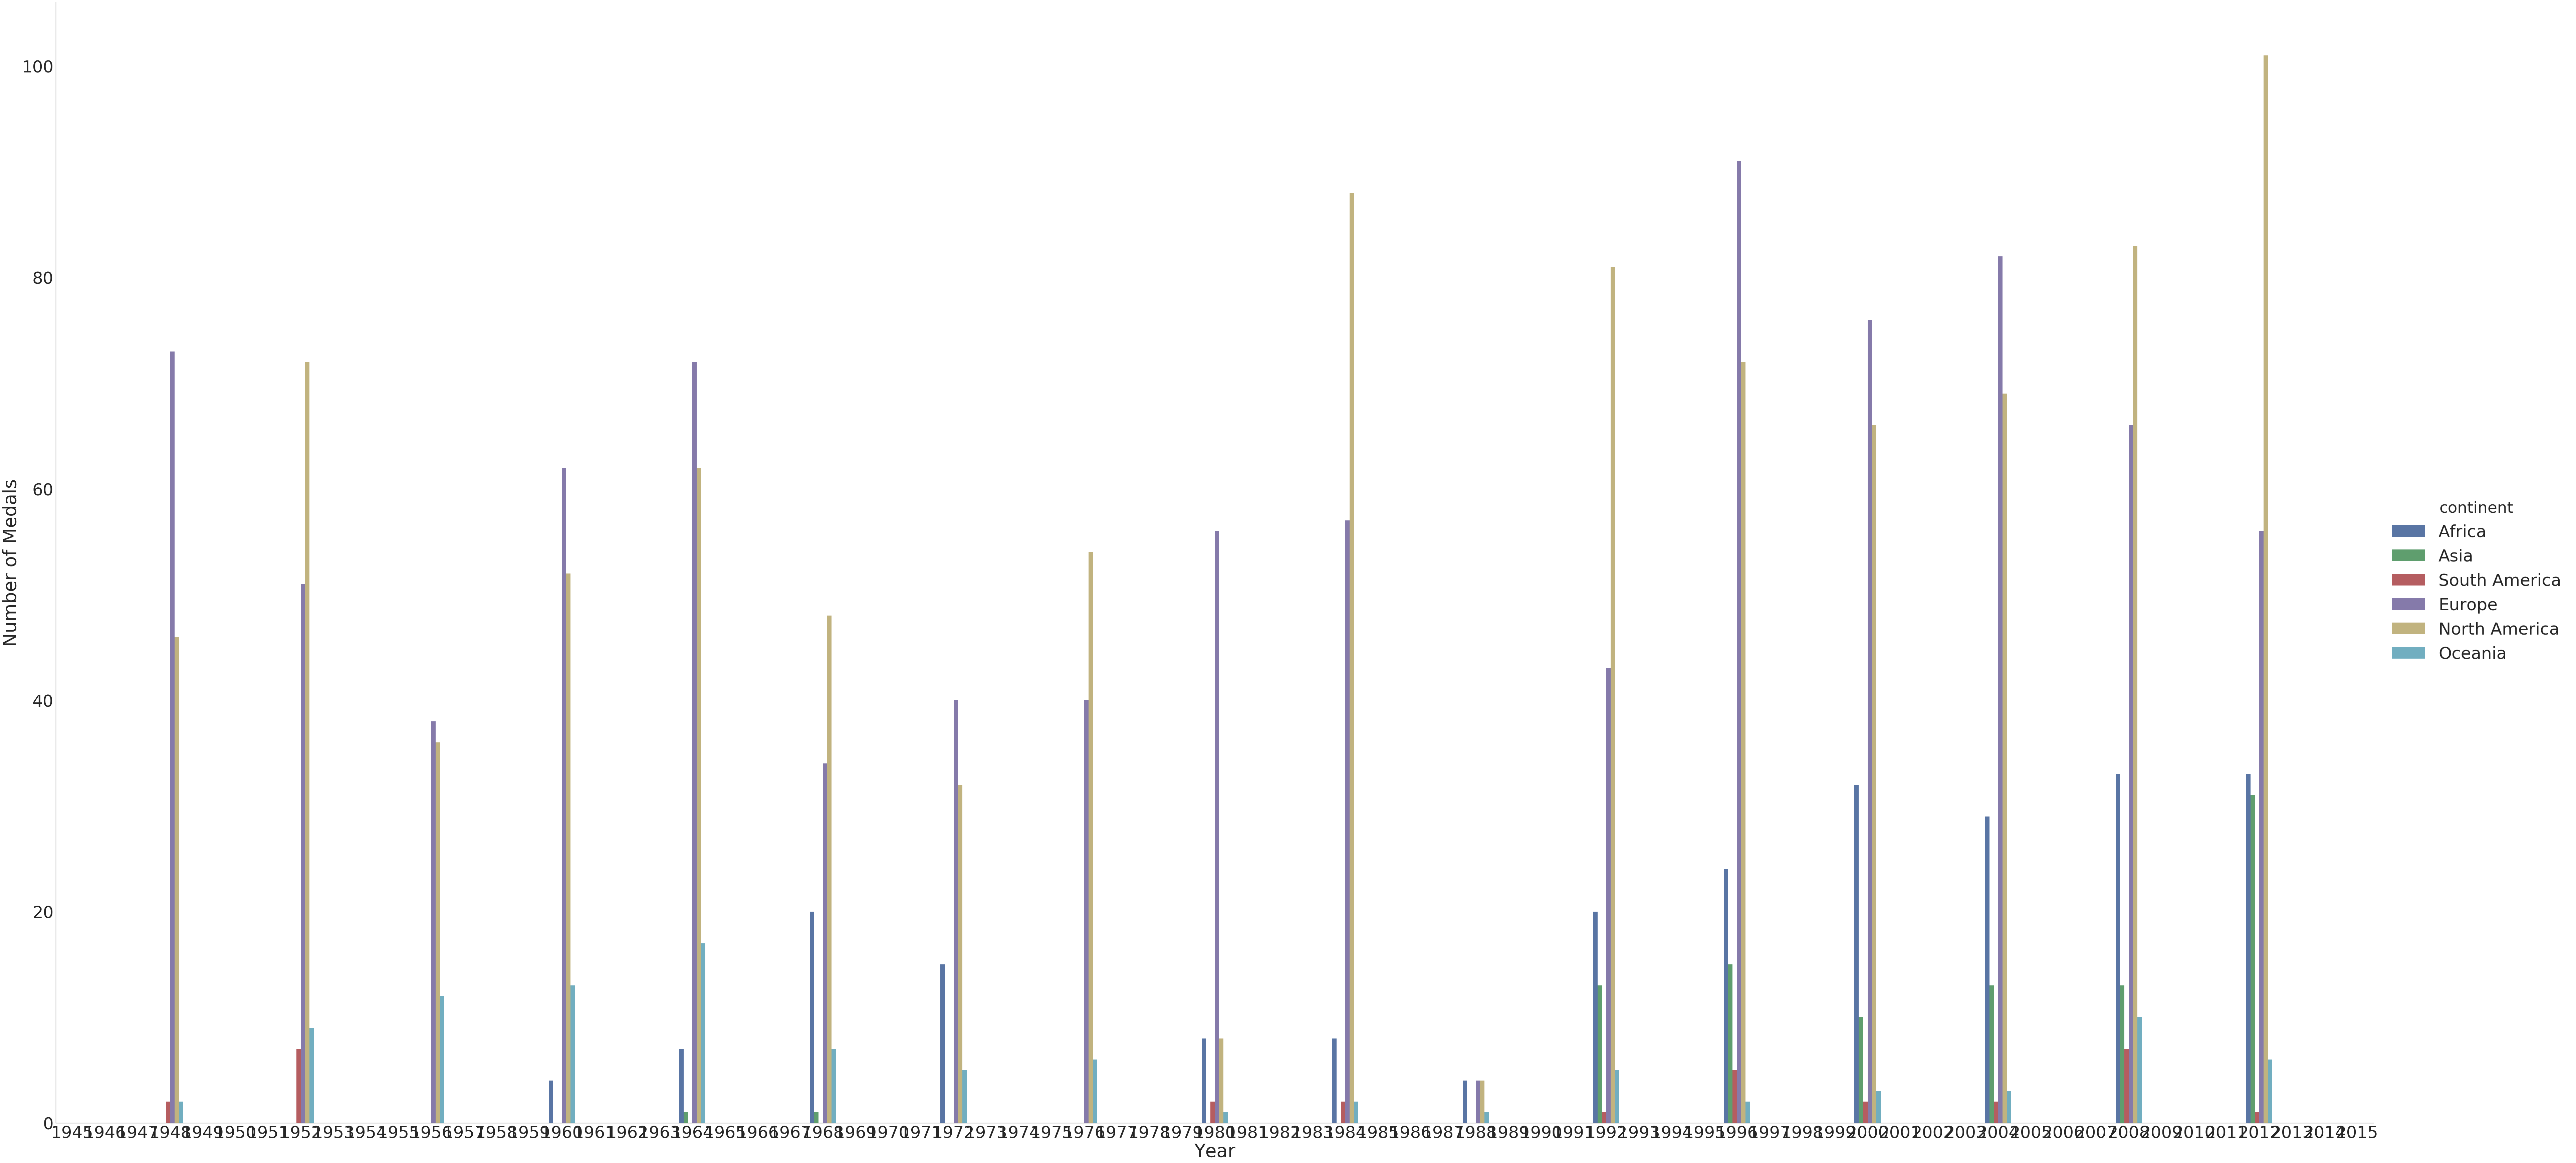

In [164]:
sns.set(font_scale=5)
with sns.axes_style('white'):
    g = sns.factorplot("Year", data=x, aspect=2.0, kind='count',
                       hue='continent',size =50, order=range(1945, 2016))
    g.set_ylabels('Number of Medals')

From the graph above unsurprisingly North America as a continet has been consistantly part of summer olympics 
in track and field since 1948(first olympic after WW2). However Afica did not join up until 1960 summer
olympics, Asia in 1964 and the first time at least one country in all continents was present was in 1992 olympics.

# Impact of political condition on the number of medals won by countries in terms of ruling government form of a particular nation

In [102]:
medal_count2 = merge_data.groupby('governmentform')['Medal'].count().sort_values(ascending=False)
medal_count2

governmentform
Federal Republic                       734
Republic                               525
Constitutional Monarchy                378
Constitutional Monarchy, Federation    122
Socialistic Republic                    40
People'sRepublic                        23
Monarchy (Sultanate)                     3
Monarchy                                 3
Name: Medal, dtype: int64

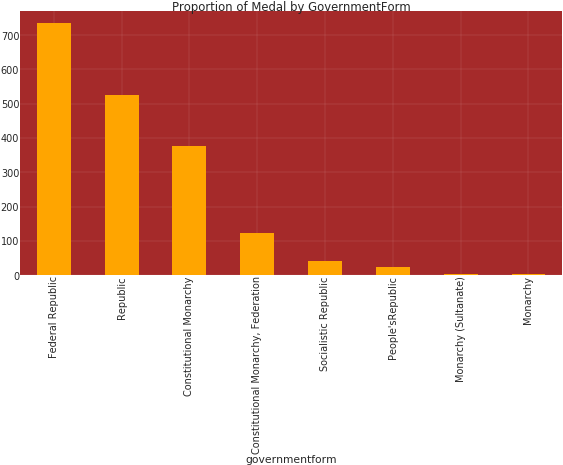

In [129]:
fig = plt.figure(figsize=(100,50), dpi=7)
ax = plt.subplot(111)
plt.rcParams['axes.facecolor'] = 'brown'
medal_count2.plot(kind='bar',color='orange',title='Proportion of Medal by GovernmentForm', legend=False)

Federal Republic as a form of government is in the lead of overall medals won through the years in summer
olympics of track and field with Monarchy coming in last. Understanding the type of government a country is ruled by might serve as
a predication of the number of medals won by that particular country, nevertheless it is salient to 
know how these government form have shaped the participation of countries, and good year to start with 
is again 1945, the end of WW2.

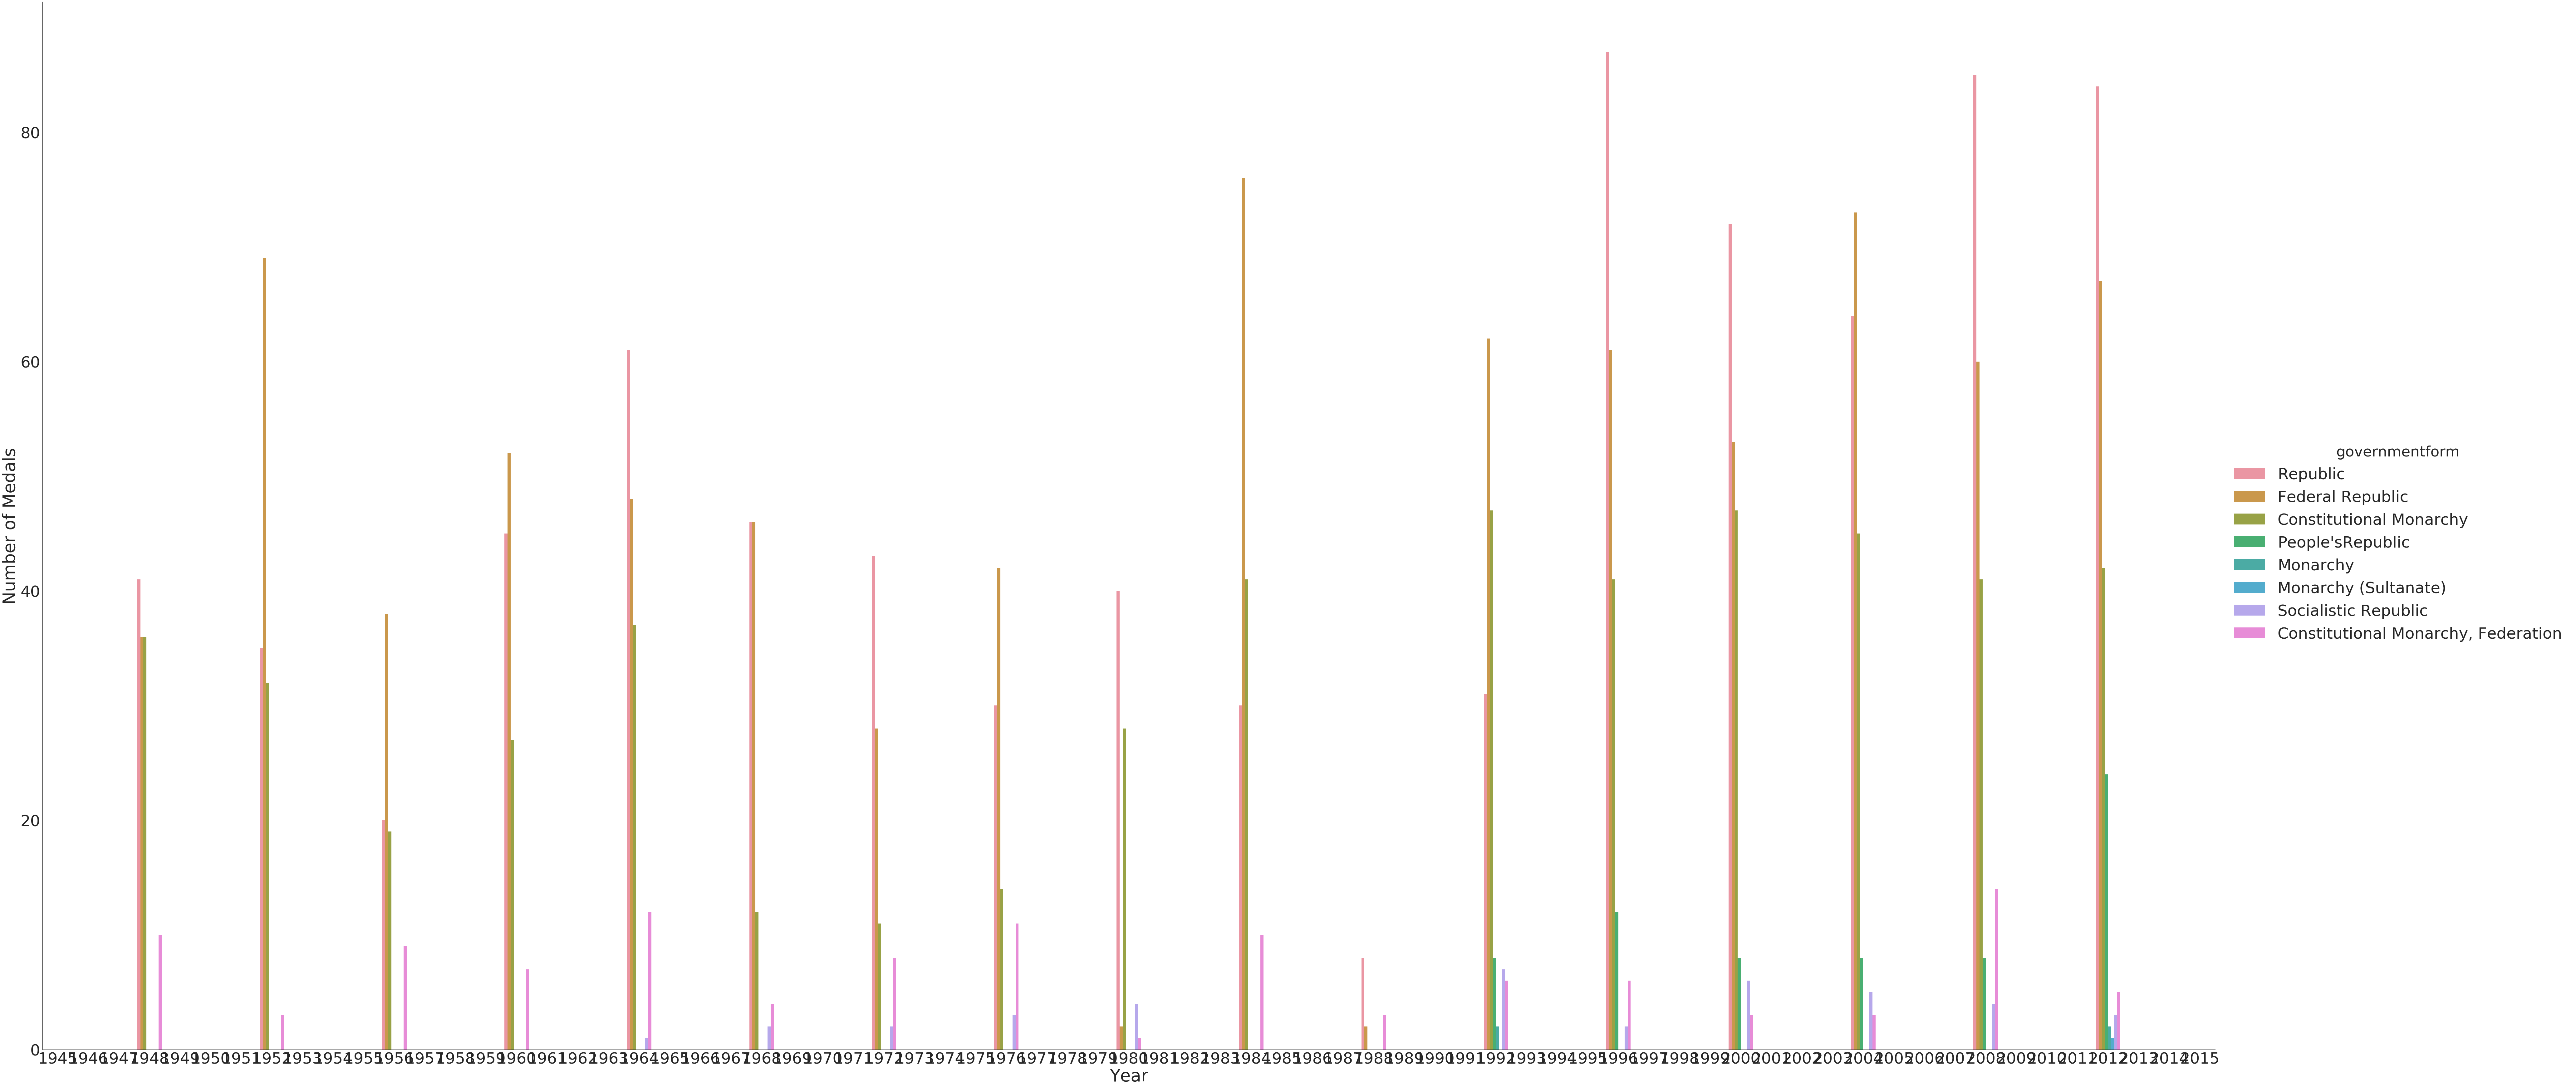

In [165]:
sns.set(font_scale=5)
with sns.axes_style('white'):
    g = sns.factorplot("Year", data=x, aspect=2.0, kind='count',
                       hue='governmentform',size =50, order=range(1945, 2016))
    g.set_ylabels('Number of Medals')

First summer olympics in track and field after World Wor 2 (1948), consisted of only three forms of government which are
Republic, Federal Republic, Constitutional Monarchy and  Constitutional Monarchy, Federation form of 
government. The first all at one country in all form of goverment participated was in 1992, which aligns
with the conlusion from above stating that the first time at least one country in all continets first
participated was in 1992 as well. In additional U.S.A, power nation, with the highest number of medals per country from my midterm project has a Federal Republic type of 
government, and these type of government has been present in all years summer olympics was held 
after WW2.

# Impact of socia-economic condition on the number of medals won by countries in terms of Gross National Product (gnp) and number of population in each nation


/usr/local/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



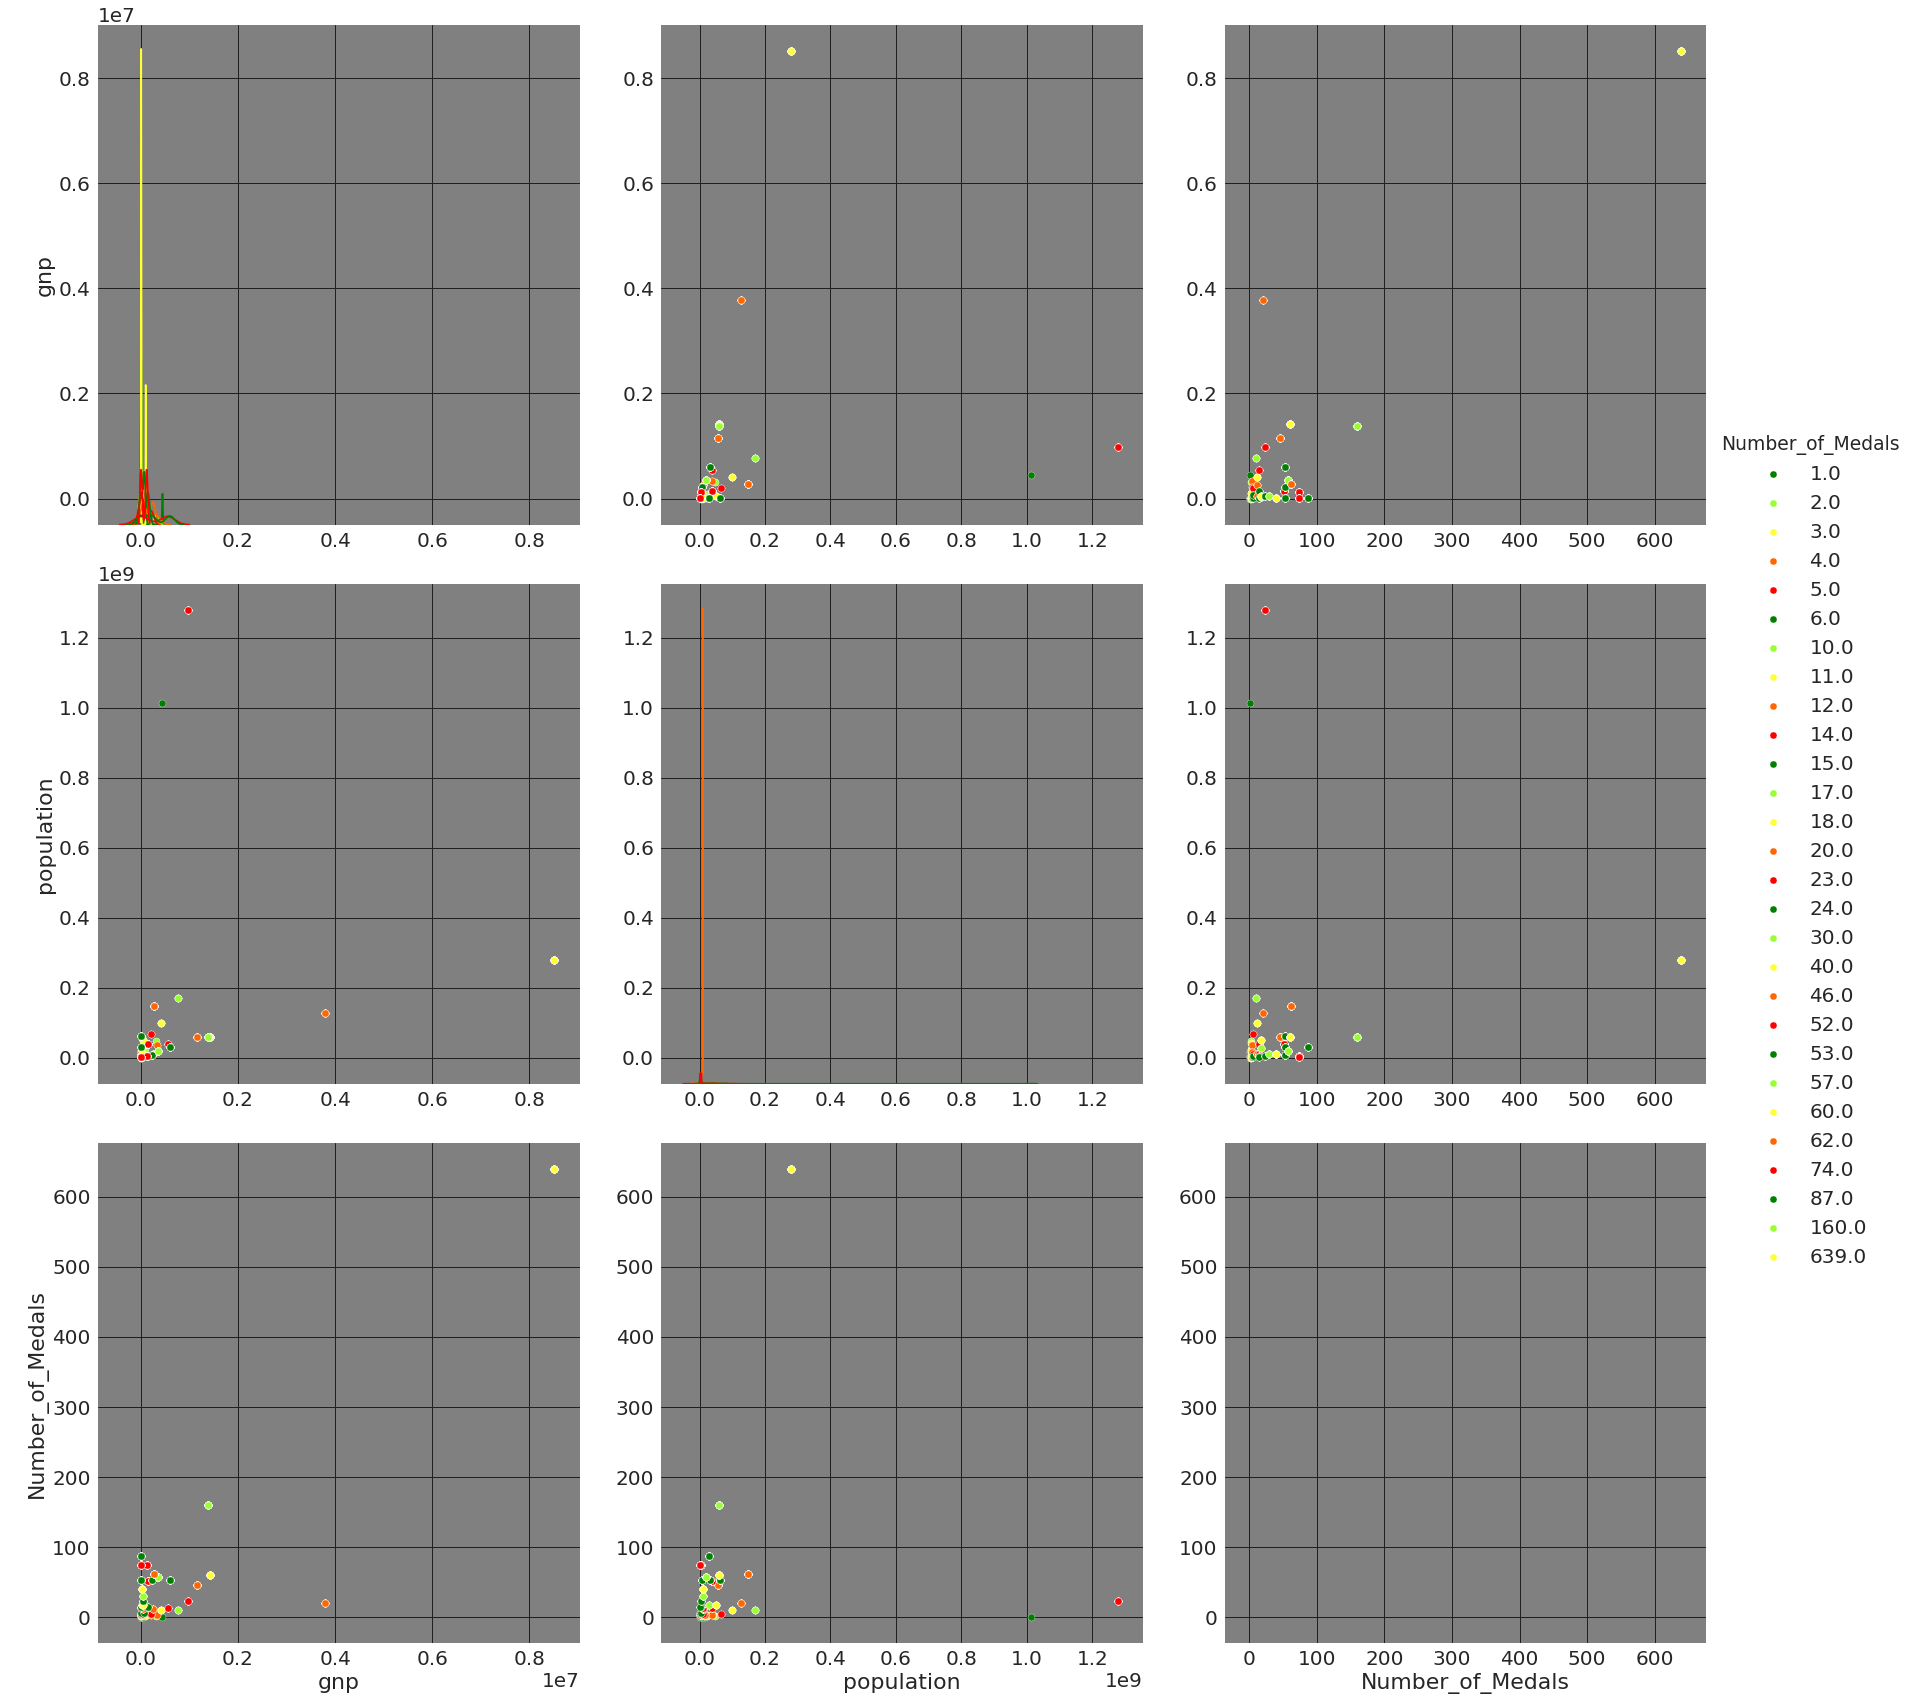

In [132]:
sns.set(font_scale=2)
flatui = ["green", "#99FF33", "#FFFF33", "#FF6600", "#FF0000"]
plt.rcParams['axes.facecolor'] = 'grey'
plt.rc('grid', color='#202020')
sns.pairplot(merge_data2[["gnp","population","Number_of_Medals"]],
             hue="Number_of_Medals", diag_kind="kde",size =8, palette=flatui)

There appear to be a strong positive linear correlation(pearsonr=.99) between number of medals won by a country and their gnp.
GNP prime definition is an economic statistic that is equal to GDP plus any income earned by residents from overseas investments minus income earned 
within the domestic economy by overseas residents. As a result that countries with higher gnp are able are more able to invest
in their countries athletic federation, through building training facilities, athletic gears and making sure that their athlets
are at their best physical and mental condition. 

On the other spectrum although, there is a linear correlation(pearsonr=.57) between number of medals won by a country and their population size
however not as strong as the one between number of medals and country gnp. This notion is comprehendable as their are
countries such as India with large population size however not as many medals. These is primarly because countries with large 
population size, often in Asia, Africa and South America don't necessarly have the infrastructure to support their athletic 
federation in a substantial manner.

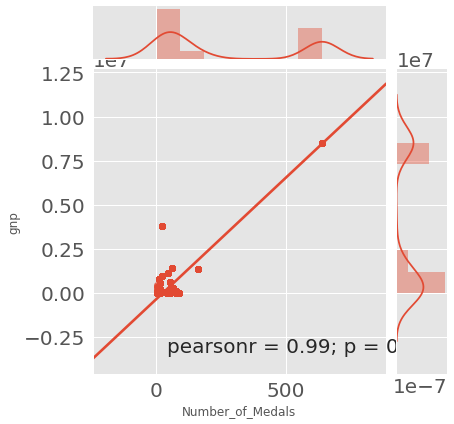

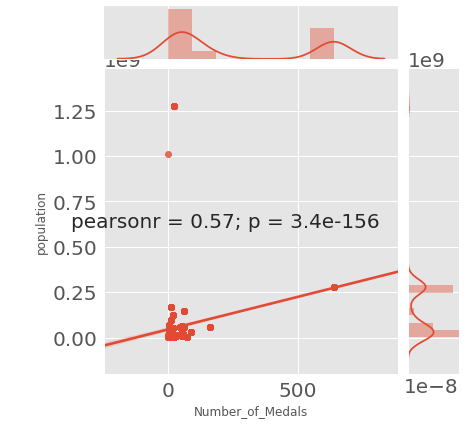

In [152]:
sns.jointplot("Number_of_Medals", "gnp", data=merge_data2, kind='reg');
sns.jointplot("Number_of_Medals", "population", data=merge_data2, kind='reg');